In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [0]:
df=pd.read_excel('/content/sample_data_v4.xlsx')#reading data
df = df.rename(columns = {'Other skills':'skills'})
df_skill=df['skills']

In [123]:
ml_score=df_skill.str.count('Python|TensorFlow|PyTorch|NumPy|PyPI|Sci-kit learn|Statistical Modeling|Machine Learning|Deep Learning|SQL|JSON|AWS|GCP|Heroku|Flask',re.I)
ml_score=ml_score.fillna(0)#filling NAN values
ml_score.tail(20)

2148    0.0
2149    0.0
2150    2.0
2151    1.0
2152    1.0
2153    2.0
2154    2.0
2155    0.0
2156    0.0
2157    2.0
2158    0.0
2159    1.0
2160    1.0
2161    0.0
2162    3.0
2163    2.0
2164    1.0
2165    1.0
2166    1.0
2167    1.0
Name: skills, dtype: float64

In [124]:
fs_score=df_skill.str.count('HTML|CSS|MongoDB|Express|React.js|Node.js|ES6|Redux|JavaScript|AWS|GCP|Python|Linux|JSON|Authentication|Authorization (JWT)',re.I)#regular expressions
fs_score=fs_score.fillna(0)
fs_score.tail(20)

2148    3.0
2149    2.0
2150    4.0
2151    0.0
2152    2.0
2153    4.0
2154    5.0
2155    0.0
2156    0.0
2157    4.0
2158    2.0
2159    1.0
2160    1.0
2161    0.0
2162    5.0
2163    2.0
2164    4.0
2165    4.0
2166    1.0
2167    4.0
Name: skills, dtype: float64

In [0]:
wd_score=df_skill.str.count('HTML|CSS|Bootstrap|AJAX|JavaScript|PHP|MySQL|REST API|AWS|GCP|Git|GitHub|Python|Linux|JSON|Authentication|Authorization (JWT)',re.I)
wd_score=wd_score.fillna(0)
wd_score.head(20)
df['webd_score']=wd_score.to_frame()
df['fsd_score']=fs_score.to_frame()
df['mld_score']=ml_score.to_frame()

In [0]:
df['webd_label'] = np.where(df.webd_score >= df.webd_score.quantile(.8), 1, 0)
df['fsd_label'] = np.where(df.webd_score >= df.fsd_score.quantile(.8), 1, 0)
df['mld_label'] = np.where(df.webd_score >= df.mld_score.quantile(.8), 1, 0)

In [127]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2168 entries, 0 to 2167
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Application ID              2168 non-null   object 
 1   Current City                2168 non-null   object 
 2   skills                      2130 non-null   object 
 3   Institute                   2155 non-null   object 
 4   Degree                      2083 non-null   object 
 5   Stream                      2071 non-null   object 
 6   Current Year Of Graduation  2168 non-null   int64  
 7   Performance_PG              351 non-null    object 
 8   Performance_UG              1834 non-null   object 
 9   Performance_12              1388 non-null   object 
 10  Performance_10              1288 non-null   object 
 11  webd_score                  2168 non-null   float64
 12  fsd_score                   2168 non-null   float64
 13  mld_score                   2168 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2a4c90e10>,
      dtype=object)

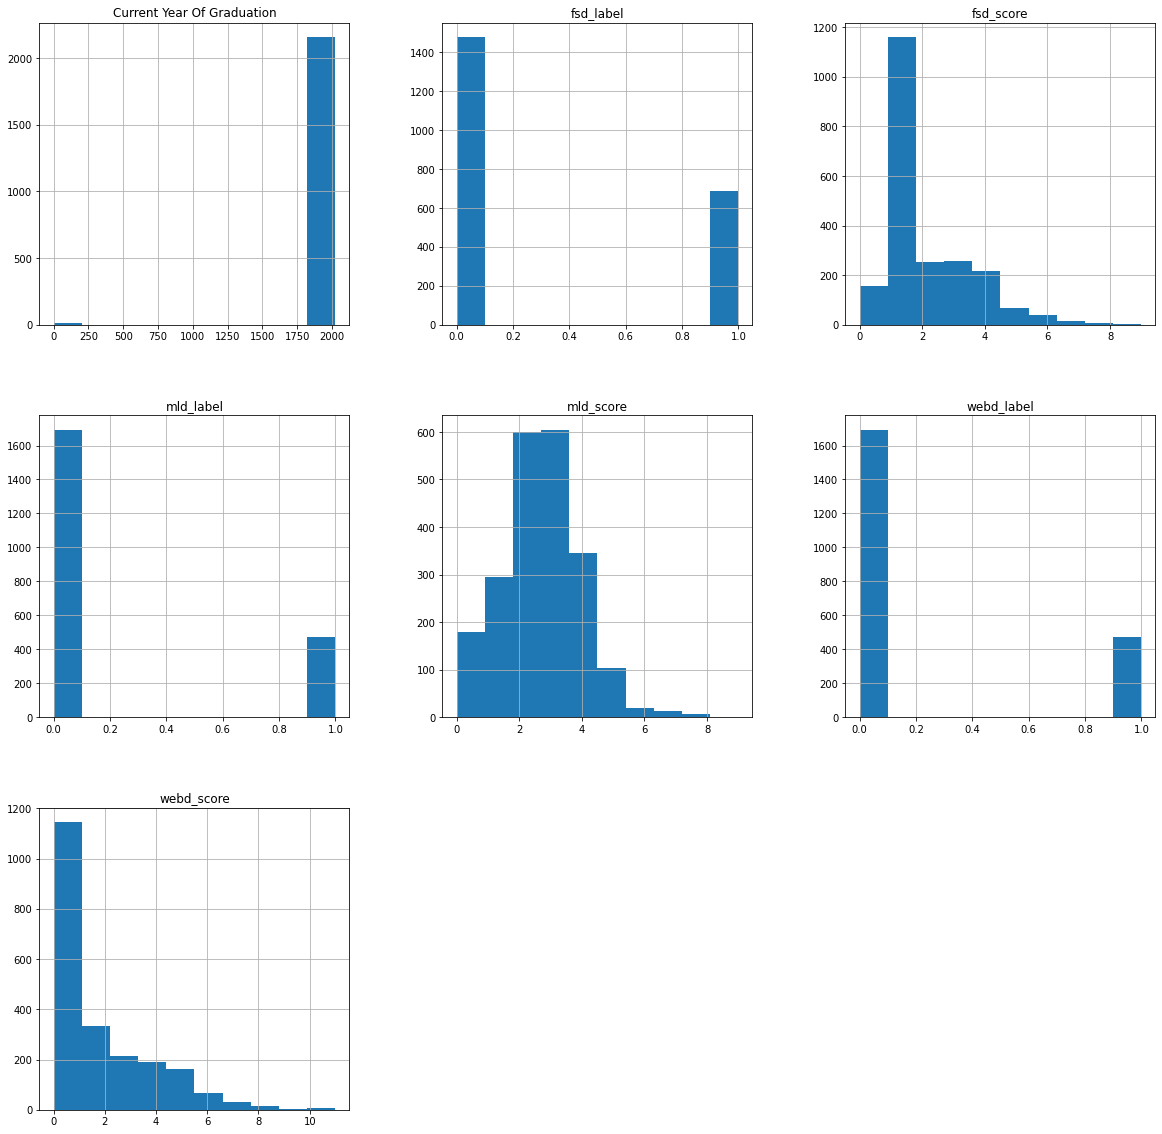

In [128]:
df.hist(figsize=(20,20))

In [129]:
df.columns

Index(['Application ID', 'Current City', 'skills', 'Institute', 'Degree',
       'Stream', 'Current Year Of Graduation', 'Performance_PG',
       'Performance_UG', 'Performance_12', 'Performance_10', 'webd_score',
       'fsd_score', 'mld_score', 'webd_label', 'fsd_label', 'mld_label'],
      dtype='object')

In [131]:
val = input("Enter your role 1)ML or FS or WD: ") 
if(val=='ML'):
  X = df[['Current Year Of Graduation','mld_score','mld_label']]
  y = df.mld_label
  X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
  dt = DecisionTreeClassifier(max_depth=6, random_state=1) 
 
  # Fitting training set
  dt.fit(X_train, y_train)
  y_pred = dt.predict(X_test)
  #  accuracy  
  acc = accuracy_score(y_test, y_pred)
  print("Test set accuracy: {:.2f}".format(acc))
  from sklearn.metrics import classification_report
  print(classification_report(y_test, y_pred))
elif(val=='FS'):
  X = df[['Current Year Of Graduation','fsd_score','fsd_label']]
  y = df.fsd_label
  X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
  dt = DecisionTreeClassifier(max_depth=6, random_state=1) 
  
  # Fitting training set
  dt.fit(X_train, y_train)
  y_pred = dt.predict(X_test)
  #  accuracy  
  acc = accuracy_score(y_test, y_pred)
  print("Test set accuracy: {:.2f}".format(acc))
  from sklearn.metrics import classification_report
  print(classification_report(y_test, y_pred))
elif(val=='WD'):
  X = df[['Current Year Of Graduation','webd_score','webd_label']]
  y = df.webd_label
  X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
  dt = DecisionTreeClassifier(max_depth=6, random_state=1) 
  

  # Fitting training set
  dt.fit(X_train, y_train)
  y_pred = dt.predict(X_test)
  # accuracy  
  acc = accuracy_score(y_test, y_pred)
  print("Test set accuracy: {:.2f}".format(acc))
  from sklearn.metrics import classification_report
  print(classification_report(y_test, y_pred))
else:
  print('input invalid')


Enter your role 1)ML or FS or WD: WD
Test set accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       339
           1       1.00      1.00      1.00        95

    accuracy                           1.00       434
   macro avg       1.00      1.00      1.00       434
weighted avg       1.00      1.00      1.00       434

